<a href="https://colab.research.google.com/github/nilberthsouza/Synthetic-Financial-Datasets-For-Fraud-Detection/blob/master/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("synt.csv")
print(df.tail())

         step      type     amount  ... newbalanceDest  isFraud  isFlaggedFraud
1280494   135   PAYMENT    5414.49  ...           0.00      0.0             0.0
1280495   135   PAYMENT   15257.53  ...           0.00      0.0             0.0
1280496   135  CASH_OUT  214843.43  ...      214843.43      0.0             0.0
1280497   135  CASH_OUT  134807.38  ...     2356438.72      0.0             0.0
1280498   135   PAYMENT   37170.63  ...            NaN      NaN             NaN

[5 rows x 11 columns]


In [15]:
df['varoldbalanceOrg'] = df.amount/df['oldbalanceOrg']
df['varoldbalanceDest'] = df.amount/df['oldbalanceDest']


df.varoldbalanceOrg.fillna(1,inplace=True)
df.varoldbalanceDest.fillna(1,inplace=True)

#certifica que celulas não fiquem com valor inf 
df.varoldbalanceOrg.map(lambda a: 1 if a == np.inf else a)
df.varoldbalanceDest.map(lambda a: 1 if a == np.inf else a)


df.isnull().sum()

step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        1
newbalanceOrig       1
nameDest             1
oldbalanceDest       1
newbalanceDest       1
isFraud              1
isFlaggedFraud       1
varoldbalanceOrg     0
varoldbalanceDest    0
maiormenor           0
dtype: int64

In [5]:
print((df['isFraud'].value_counts()[1]/df['isFraud'].value_counts()[0])*100,"%")
print("Max", df.amount[df.isFraud == 1 ].max())
print("Max amount",df.amount.max())
print("dif max amount/max fraud", df.amount.max()/df.amount[df.isFraud == 1].max())


0.12056708753076728 %
Max 10000000.0
Max amount 10000000.0
dif max amount/max fraud 1.0


In [8]:
df['maiormenor'] = 0
maxminvalue = df.amount[df.isFraud == 1].max()
minvalue = df.amount.min()

for i in range(len(df.isFraud)):
    if df['amount'][i] < (maxminvalue + minvalue):
        df['maiormenor'][i] = 1
    else:
        df['maiormenor'][i] = 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


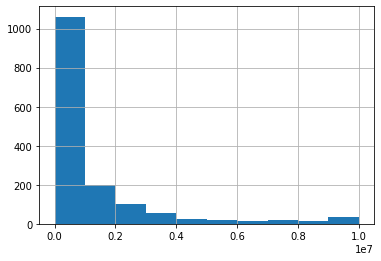

In [9]:
df.amount[df.isFraud == 1].hist()

In [13]:
df = df.sample(frac=1)
df = df.sample(frac=1)
df = df.sample(frac=1)
X_train, X_test , y_train, y_test = train_test_split(df.drop(['isFraud'],axis=1),df['isFraud'],test_size=0.3, random_state=0)

print(len(X_train),len(X_test),len(y_train),len(y_test))



896349 384150 896349 384150


In [14]:
train = X_train
train['isFraud'] = y_train
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,varoldbalanceOrg,varoldbalanceDest,maiormenor,isFraud
1213075,133,CASH_IN,82292.16,C678246746,2064611.42,2146903.57,C736899576,3600339.74,3518047.59,0.0,0.039858,0.022857,1,0.0
1128338,131,PAYMENT,15958.28,C344228431,50924.00,34965.72,M158766354,0.00,0.00,0.0,0.313374,inf,1,0.0
578247,33,CASH_IN,117731.69,C1359194696,3027215.12,3144946.81,C33603018,610857.61,493125.92,0.0,0.038891,0.192732,1,0.0
422868,18,CASH_OUT,211749.20,C976528733,52916.00,0.00,C385968765,1985518.08,1956714.36,0.0,4.001610,0.106647,1,0.0
467999,19,CASH_OUT,206835.75,C1567995038,20383.00,0.00,C707234638,16139.00,104480.66,0.0,10.147464,12.815896,1,0.0


In [16]:
print(train.columns)
display(train.dtypes)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud',
       'varoldbalanceOrg', 'varoldbalanceDest', 'maiormenor', 'isFraud'],
      dtype='object')


step                   int64
type                  object
amount               float64
nameOrig              object
oldbalanceOrg        float64
newbalanceOrig       float64
nameDest              object
oldbalanceDest       float64
newbalanceDest       float64
isFlaggedFraud       float64
varoldbalanceOrg     float64
varoldbalanceDest    float64
maiormenor             int64
isFraud              float64
dtype: object

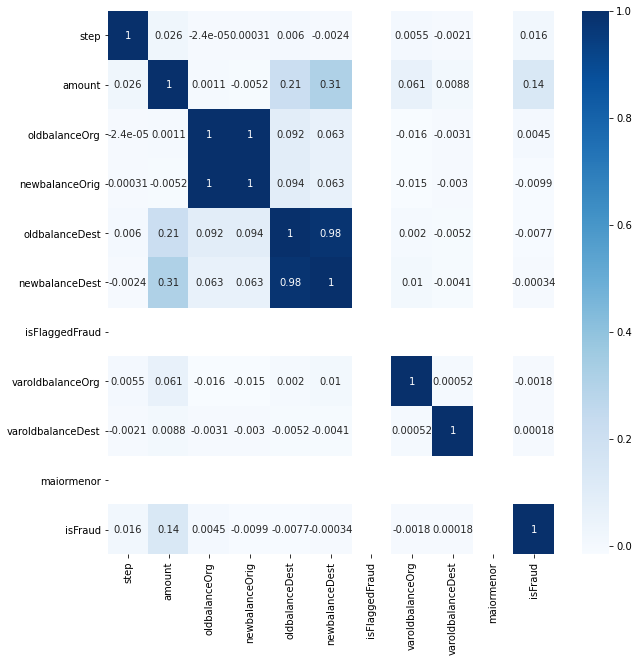

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap="Blues")

ValueError: ignored

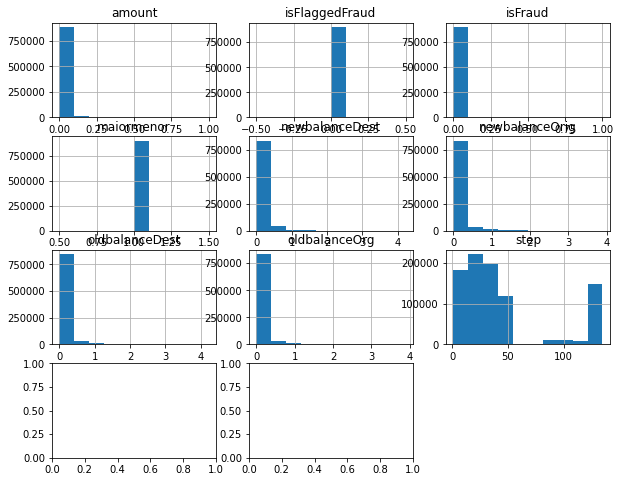

In [18]:
train.hist(figsize=(10,8))

Text(0.5, 1.0, 'Type')

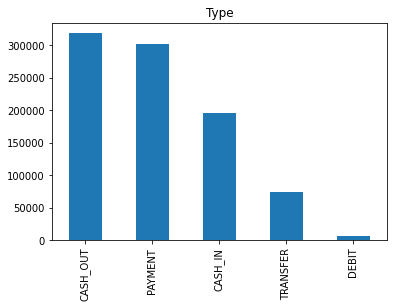

In [19]:
train.type.value_counts().plot(kind="bar")
plt.title("Type")

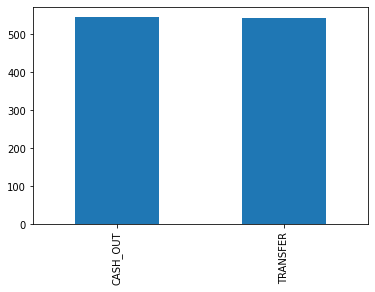

In [20]:
train.type[train.isFraud == 1].value_counts().plot(kind="bar")


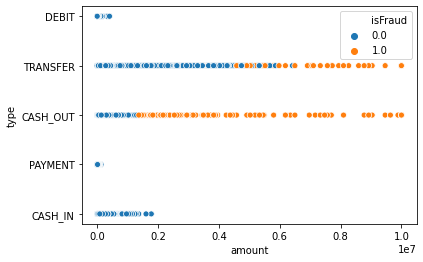

In [21]:
sns.scatterplot(x=train.amount,y=train.type, hue=train.isFraud)

In [22]:
print(train.amount[train.isFraud == 0].value_counts().mean())
print(train.amount[train.isFraud == 1].value_counts().mean())

1.0310882917621151
1.5617816091954022


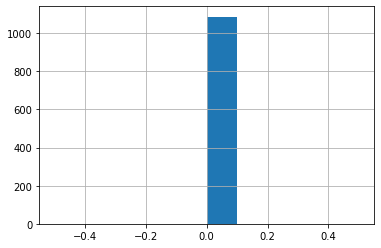

In [23]:
train.isFlaggedFraud[train.isFraud == 1].hist()


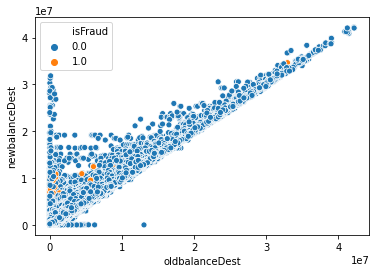

In [24]:
sns.scatterplot(x = train.oldbalanceDest,y=train.newbalanceDest,hue=df.isFraud)


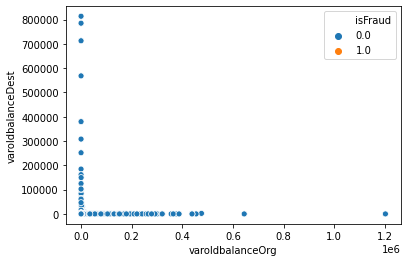

In [25]:
sns.scatterplot(x=df['varoldbalanceOrg'],y=df['varoldbalanceDest'],hue=df.isFraud)

In [26]:
df.dtypes

step                   int64
type                  object
amount               float64
nameOrig              object
oldbalanceOrg        float64
newbalanceOrig       float64
nameDest              object
oldbalanceDest       float64
newbalanceDest       float64
isFraud              float64
isFlaggedFraud       float64
varoldbalanceOrg     float64
varoldbalanceDest    float64
maiormenor             int64
dtype: object

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

modelOnePredictions = model.predict(X_test)

from sklearn.metrics import classification_report

classification_report( y_test, modelOnePredictions)

ValueError: ignored